In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.linear_model import LinearRegression

## Loading files

In [2]:
DATA_PATH1 = 'data/PisoFirme_AEJPol-20070024_household.dta'
# Once upon a time there was a DATA_PATH2 but it is of no use now and so we keep the numbers 3 and 4 in order no to change everything
DATA_PATH_3 = 'data/children-per-woman-by-gdp-per-capita.csv'
DATA_PATH_4 = 'data/child-mortality-gdp-per-capita.csv'

In [3]:
data1 = pd.read_stata(DATA_PATH1)
data1.head(10)

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.503670,25.583067,7.0,40,0.300000,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.503670,25.583067,7.0,40,0.300000,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.503670,25.583067,7.0,40,0.300000,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.503670,25.583067,7.0,47,0.300000,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.503670,25.583067,7.0,47,0.300000,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778
5,0.0,70000537.0,-103.503670,25.583067,7.0,41,0.300000,0.036629,0.555554,819.0,...,25.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,8.517193
6,0.0,70000537.0,-103.503670,25.583067,7.0,40,0.300000,0.036629,0.555554,819.0,...,18.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857933,9.615806
7,0.0,70000679.0,-103.489845,25.578873,7.0,34,0.266667,0.030579,0.654435,327.0,...,22.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,9.392662
8,0.0,70000679.0,-103.489845,25.578873,7.0,34,0.266667,0.030579,0.654435,327.0,...,16.0,19.0,1.0,0.0,1.0,0.0,0.0,1.0,7.313221,11.512925
9,0.0,70000679.0,-103.489845,25.578873,7.0,22,0.266667,0.030579,0.654435,327.0,...,22.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,5.703783,8.006368


In [4]:
data3 = pd.read_csv(DATA_PATH_3)
data3.head(10)

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN
5,Afghanistan,AFG,1804,3280000.0,NaN,NaN,NaN
6,Afghanistan,AFG,1805,3280000.0,NaN,NaN,NaN
7,Afghanistan,AFG,1806,3280000.0,NaN,NaN,NaN
8,Afghanistan,AFG,1807,3280000.0,NaN,NaN,NaN
9,Afghanistan,AFG,1808,3280000.0,NaN,NaN,NaN


In [5]:
data4 = pd.read_csv(DATA_PATH_4)
data4.head(10)

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))","Child mortality (Select Gapminder, v10) (2017)"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN
5,Afghanistan,AFG,1804,3280000.0,NaN,NaN,NaN
6,Afghanistan,AFG,1805,3280000.0,NaN,NaN,NaN
7,Afghanistan,AFG,1806,3280000.0,NaN,NaN,NaN
8,Afghanistan,AFG,1807,3280000.0,NaN,NaN,NaN
9,Afghanistan,AFG,1808,3280000.0,NaN,NaN,NaN


## Managing Nan values in the different columns of interest of data1

Now we do some data cleaning on *data3* and *data4* in order to avoid all the *Nans* in the 3 columns of interest for each *DataFrame* (i.e. the 2 last columns and the *Year* column). The *Year* column is actually not an issue, so we focuss on the 2 last columns.

But first, we select only the lines that correspond to a year after 2000. The datasets originally have data going back to 1800 and this is of no interest to us in this study even though valuable informations could be retrieved from that (e.g. a temporal study on countries from a given continent about children births and mortality).

With these 2 datasets we are looking for qualitative results rather than quantitative ones. As a consequence, we discard all lines with *Nans* in the 2 last columns, knowing that enough values will remain (look at the printed shape after the operation).

In [6]:
data3 = data3.loc[np.argwhere(data3['Year'].values >= 2000)[:, 0]]
data3 =  data3.set_index(np.arange(data3.shape[0]))
data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'] = np.nan_to_num(data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'], nan = -1)
data3 = data3.loc[np.argwhere(data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'].values >= 0)[:, 0]]
data3 =  data3.set_index(np.arange(data3.shape[0]))
data3['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'] = np.nan_to_num(data3['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'], nan = -1)
data3 = data3.loc[np.argwhere(data3['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'].values >= 0)[:, 0]]
data3 =  data3.set_index(np.arange(data3.shape[0]))
data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'] = data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'] / np.max(data3['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))'])
print(data3.shape)
data3.head(10)

(3109, 7)


,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)"
0,Albania,ALB,2000,3129000.0,NaN,0.031716,2.157
1,Albania,ALB,2001,3130000.0,NaN,0.032966,2.068
2,Albania,ALB,2002,3126000.0,NaN,0.033620,1.981
3,Albania,ALB,2003,3118000.0,NaN,0.034959,1.897
4,Albania,ALB,2004,3105000.0,NaN,0.036022,1.821
5,Albania,ALB,2005,3087000.0,NaN,0.038969,1.755
6,Albania,ALB,2006,3063000.0,NaN,0.042414,1.704
7,Albania,ALB,2007,3034000.0,NaN,0.045755,1.671
8,Albania,ALB,2008,3003000.0,NaN,0.051417,1.654
9,Albania,ALB,2009,2973000.0,NaN,0.055630,1.652


In [7]:
data4 = data4.loc[np.argwhere(data4['Year'].values >= 2000)[:, 0]]
data4 =  data4.set_index(np.arange(data4.shape[0]))
data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] = np.nan_to_num(data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'], nan = -1)
data4 = data4.loc[np.argwhere(data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'].values >= 0)[:, 0]]
data4 =  data4.set_index(np.arange(data4.shape[0]))
data4['Child mortality (Select Gapminder, v10) (2017)'] = np.nan_to_num(data4['Child mortality (Select Gapminder, v10) (2017)'], nan = -1)
data4 = data4.loc[np.argwhere(data4['Child mortality (Select Gapminder, v10) (2017)'].values >= 0)[:, 0]]
data4 =  data4.set_index(np.arange(data4.shape[0]))
data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] = data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] / np.max(data4['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'])
print(data4.shape)
data4.head(10)

(2732, 7)


,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))","Child mortality (Select Gapminder, v10) (2017)"
0,Afghanistan,AFG,2000,20780000.0,NaN,0.004707,129.7
1,Afghanistan,AFG,2001,21607000.0,NaN,0.004432,126.0
2,Afghanistan,AFG,2002,22601000.0,NaN,0.006968,122.2
3,Afghanistan,AFG,2003,23681000.0,NaN,0.007122,118.3
4,Afghanistan,AFG,2004,24727000.0,NaN,0.007090,114.4
5,Afghanistan,AFG,2005,25654000.0,NaN,0.007602,110.3
6,Afghanistan,AFG,2006,26433000.0,NaN,0.008050,106.3
7,Afghanistan,AFG,2007,27101000.0,NaN,0.009267,102.2
8,Afghanistan,AFG,2008,27722000.0,NaN,0.009376,98.2
9,Afghanistan,AFG,2009,28395000.0,NaN,0.010689,94.1


## Managing Nan values in the different columns of interest of data1

**S_headage** and **S_spouseage**: We replace the Nans by the mean age of the corresponding column. Replacing the Nans with 0 would lead to aberrant data (head of household and the spouse cannot be babies).

**S_washhands**, **S_incomepc**, **S_assetspc**, **S_cashtransfers**: We also replace the Nans by the mean value of the column. It makes more sense for fiancial resources than to assume the resources are null. he same applies to the number of time people wash their hands.

**S_rooms**: We replace the Nans by 1. If we don't know the number of rooms in the household, as it cannot be 0, we take 1, i.e. the lowest possible value

**S_headeduc**, **S_spouseeduc**, **S_waterland**, **S_waterhouse**, **S_electricity**, **S_hasanimals**, **S_animalsinside**, **S_garbage**, **S_demi** (i in \[1, 8\]), **S_HHpeople**: We replace the Nans by a 0. This obviously has an influence on the data, but at least a 0 value is coherent with the meaning of the variable. All these variables are categorical variables and thus taking the mean of the variable would not mean much.

**S_shcementfloor**: We also replace the Nans with 0. By default, if we don't know how many rooms have cement floor, we assume there aren't any.

**S_shpeoplework**: We also replace the Nans with 0. By default, if we don't know how many people work in the household, we assume there aren't any.

**S_satisfloor**, **S_satishouse**, **S_satislife**: We replace the Nan by 0.5. We consider that no value means a mean satisfaction.

**S_cesds**, **S_pss**: As for the satisfaction, we replace by the mean value. Here it means 30 and 20 respectively.

In [8]:
data1['S_headage'] = np.nan_to_num(data1['S_headage'], nan = np.nanmean(data1['S_headage']))
data1['S_spouseage'] = np.nan_to_num(data1['S_spouseage'], nan = np.nanmean(data1['S_spouseage']))
data1['S_washhands'] = np.nan_to_num(data1['S_washhands'], nan = np.nanmean(data1['S_washhands']))
data1['S_incomepc'] = np.nan_to_num(data1['S_incomepc'], nan = np.nanmean(data1['S_incomepc']))
data1['S_assetspc'] = np.nan_to_num(data1['S_assetspc'], nan = np.nanmean(data1['S_assetspc']))
data1['S_cashtransfers'] = np.nan_to_num(data1['S_cashtransfers'], nan = np.nanmean(data1['S_cashtransfers']))

data1['S_rooms'] = np.nan_to_num(data1['S_rooms'], nan = 1)

data1['S_headeduc'] = np.nan_to_num(data1['S_headeduc'], nan = 0)
data1['S_spouseeduc'] = np.nan_to_num(data1['S_spouseeduc'], nan = 0)
data1['S_waterland'] = np.nan_to_num(data1['S_waterland'], nan = 0)
data1['S_waterhouse'] = np.nan_to_num(data1['S_waterhouse'], nan = 0)
data1['S_electricity'] = np.nan_to_num(data1['S_electricity'], nan = 0)
data1['S_hasanimals'] = np.nan_to_num(data1['S_hasanimals'], nan = 0)
data1['S_animalsinside'] = np.nan_to_num(data1['S_animalsinside'], nan = 0)
data1['S_garbage'] = np.nan_to_num(data1['S_garbage'], nan = 0)
for i in range(1, 9):
    data1[f'S_dem{i}'] = np.nan_to_num(data1[f'S_dem{i}'], nan = 0)
data1['S_HHpeople'] = np.nan_to_num(data1['S_HHpeople'], nan = 0)

data1['S_shcementfloor'] = np.nan_to_num(data1['S_shcementfloor'], nan = 0)

data1['S_shpeoplework'] = np.nan_to_num(data1['S_shpeoplework'], nan = 0)

data1['S_satisfloor'] = np.nan_to_num(data1['S_satisfloor'], nan = 0.5)
data1['S_satishouse'] = np.nan_to_num(data1['S_satishouse'], nan = 0.5)
data1['S_satislife'] = np.nan_to_num(data1['S_satislife'], nan = 0.5)

data1['S_cesds'] = np.nan_to_num(data1['S_cesds'], nan = 30)
data1['S_pss'] = np.nan_to_num(data1['S_pss'], nan = 20)

data1.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778


## Engineering new features

**parents_age:** Mean age of the 2 parents. t is computed as (*S_headage* + *S_spouseage*) / 2. We take the age of the head of the household rather than the age of the father because the father is not always present and we assume that the head of households replaces the father then. It is of more impact than an absent father.

**parents_educ:** Mean number of years of education for the 2 parents. It is computed as (*S_headeduc* + *S_spouseeduc*) / 2. Once again we take into account the education of the head of the households instead of the the education of the father

**access_primary_needs:** Facility of access to the primary needs (water and elecricity here). It is defined as (*S_waterland* + *S_waterhouse*) / 4 + *S_electricity* / 2. We regroup *S_waterland* and *S_waterhouse* because they are somehow describing the same thing but with various levels.

**disease_spread:** A measure of how easily diseases can be transmitted for a specific household. It is computed as (*S_hasanimals* + *S_hasanimalsinside*) / 6 + (1 - *S_washhands* / Max(*S_washhands*)) / 3 + (1 - *S_garbage*) / 3. We consider 1 - *S_garbage* because when equal to 1, *S_garbage* means that the household uses the garbage collection service and is thus less prone to propagate and get diseases. As for *S_waterhouse* and *S_waterland*, *S_hasanimals* and *S_animalsinside* are regrouped into one variable. Finally, *S_washhands* is scaled between 0 and 1 by dividing the variable by its maximum and then we consider 1 - *S_washhands_normalized* because, the more people in the household wash their hands, the leas the diseases can be propagated.

**financial_health:** The financial health of the household. It is defined as a mean of the sum of the revenues in the household and the value of their assets (after normalisation): (*S_incomepc* / Max(*S_incomepc*) + *S_assetspc* / Max(*S_assetspc*)) / 2.

**help_gov:** The help provided by the government in term of cash flows. For that we simply normalize *S_cashtransfers* by dividing it by its maximum value.

**gender_frac:** The proportion of men in the household. We want to see if there is a gender based discrepancy.

**children_frac:** The proportion of children in the household. Children don't earn money (or at least not a proper salary), they are a financial charge to the household. Moreover, they are more prone to get sick. We want to see if this has an incidence on the benefits of *Piso Firme*.

**nb_children:** The number of children in the household.This is slightly different from the variable *children_frac* that focuses more on the financial aspect (number of people able to earn money vs the number of people not able to earn money). Here we look at the children as an indicator of social status and possible indicator of happiness / satisfaction with life. As a consequence, we will consider it both as an input and output variable.

**overcrowding:** The ratio between the number of people in the household and the number of rooms. More people means also more chances to get contaminated.

In [9]:
data1['parents_age'] = (data1['S_headage'] + data1['S_spouseage']) / 2
data1['parents_educ'] = (data1['S_headeduc'] + data1['S_spouseeduc']) / 2
data1['access_primary_needs'] = (data1['S_waterland'] + data1['S_waterhouse']) / 4 + data1['S_electricity'] / 2
data1['disease_spread'] = (data1['S_hasanimals'] + data1['S_animalsinside']) / 6 + (2 - data1['S_garbage'] - data1['S_washhands'] / np.max(data1['S_washhands'])) / 3
data1['financial_health'] = (data1['S_incomepc'] / np.max(data1['S_incomepc']) + data1['S_assetspc'] / np.max(data1['S_assetspc'])) / 2
data1['help_gov'] = data1['S_cashtransfers'] / np.max(data1['S_cashtransfers'])
data1['gender_frac'] = np.sum(data1[[f'S_dem{i}' for i in range(1, 5)]], axis=1)
data1['children_frac'] = np.sum(data1[[f'S_dem{i}' for i in [1, 2, 5, 6]]], axis=1)
data1['nb_children'] = data1['S_HHpeople'] * np.sum(data1[[f'S_dem{i}' for i in [1, 2, 5, 6]]], axis=1)
data1['overcrowding'] = data1['S_HHpeople'] / data1['S_rooms']

# find the line where there are no demographic data (all 'S_dem{i}' are set to 0)
print(np.argwhere(np.sum(data1[[f'S_dem{i}' for i in range(1, 9)]], axis=1).values == 0)[0, 0])

2127


We notice that at the line 2127, the demographic data are all set to 0 (probably because all the data are Nans in the dataset). We thus get a Nan at this line for the columns *gender_frac* and *children_frac* and *overcrowding*. To avoid any problem in the analysis, we replace the Nans in these columns by a 0. In the case of the variable *overcrowding*, we get a very high value instead. As a consequence, we replace the value of *overcrowding* at line 2127 by a 0.

In [10]:
for col in ['gender_frac', 'children_frac', 'nb_children', 'overcrowding']:
    data1[col] = np.nan_to_num(data1[col], nan = 0)

## Defining input and output variables

We chose as input variables, features that are meaningful in a socio-economic point of view. These variables are mostly the engineered features from before, to which we added the variable *S_shcementfloor*, which as shown in the article, has an impact on health and social issues.

In [11]:
input_vars = ['parents_age', 'parents_educ', 'access_primary_needs', 'disease_spread', 'financial_health', 'help_gov',
             'gender_frac', 'S_shpeoplework', 'overcrowding', 'S_shcementfloor', 'nb_children']

We want to find variables on which the input variables might have an effect on. Here we are interested in social outcomes and hence we look at the stress and depression scale along with the number of children per household. The number of children per household is somewhat a tricky notion as it can be considered both as a cause and as an effect, depending on what we are looking at. This is why we are putting it both into the inputs and the outputs.

We did not look at variables such as *S_satisfloor*, *S_satishouse* or *S_satislife* for 2 main reasons. The first one is that it is a bit redundant with *S_cesds* and *S_pss*. The second one is that these are binary variables and thus they are not suited for a correlation computation.

In [12]:
out_vars2 = ['S_cesds', 'S_pss', 'nb_children']

## Computing correlations

First, we compute Pearson's correlation to test for linear relationships. We then compute Spearman's correlation to test for more general relationships (i.e. non linear). Spearman can be used for linear relationships as well, but in that case it is less powerful than Pearson. This is why we tested Pearson first.

The plots show the correlation values in a table with colors corresponding to the value of the correlation. Correlation that are not significant at a 95% confidence level are circled in red.

In [13]:
def plot_square(ax, i, j, color='r', linewidth=1):
    """
    Plot a square of side 1 at the given coordinates (bottom left of the square) on the given ax
    """
    top_r, top_l, bottom_r, bottom_l = (i+1, j+1), (i, j+1), (i+1, j), (i, j)
    ax.plot([top_r[0], top_l[0]], [top_r[1], top_l[1]], c=color, linewidth=linewidth)
    ax.plot([bottom_r[0], bottom_l[0]], [bottom_r[1], bottom_l[1]], c=color, linewidth=linewidth)
    ax.plot([top_r[0], bottom_r[0]], [top_r[1], bottom_r[1]], c=color, linewidth=linewidth)
    ax.plot([top_l[0], bottom_l[0]], [top_l[1], bottom_l[1]], c=color, linewidth=linewidth)


def plot_correlations(ax, fig, correlations, p_values, x_labels, y_labels, title, color_boxes='r', linewidth_boxes=1):
    """
    Plot a table with colors representing the level of correlation between a row and a column.
    Circled in red are the correlations that are not significant at a 95% confidence level
    """
    pcolor = ax.pcolormesh(correlations, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_xticks(np.arange(len(x_labels)) + 0.5)
    ax.set_yticks(np.arange(len(y_labels)) + 0.5)
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_title(title)
    
    # plotting text and red rectangles around boxes with a p-value > 0.05
    for i in range(len(correlations)):
        for j in range(len(correlations[i])):
            ax.text(j + .4, i + .35, str(round(correlations[i, j], 3)))
            if p_values[i, j] > 0.05:
                plot_square(ax, j, i, color=color_boxes, linewidth=linewidth_boxes)
    
    fig.colorbar(pcolor, ax=ax)


def find_correlation(corr_func, in_data, out_data, in_vars, out_vars):
    """
    Find the correlations (given a correlation function - Pearson or Spearman) between in_data[in_vars] and out_data[out_vars]
    """
    corr_dic = {}
    p_dic = {}
    corr_array = []
    p_array = []

    for in_var in in_vars:
        corr_array.append([])
        p_array.append([])
        for out_var in out_vars:
            corr_dic[in_var, out_var], p_dic[in_var, out_var] = corr_func(in_data[in_var], out_data[out_var])
            corr_array[-1].append(corr_dic[in_var, out_var])
            p_array[-1].append(p_dic[in_var, out_var])

    corr_array = np.array(corr_array)
    p_array = np.array(p_array)
    
    return corr_dic, p_dic, corr_array, p_array

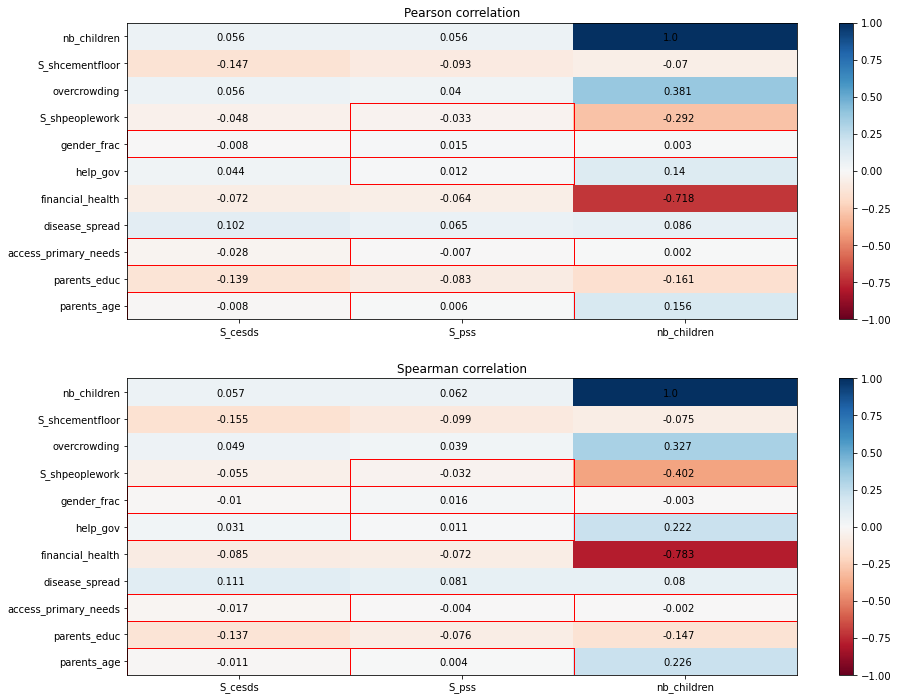

In [14]:
pearson_corr_dic2, pearson_p_dic2, pearson_corr_for_plot2, pearson_p_for_plot2 = find_correlation(pearsonr,
                                                                                                  data1,
                                                                                                  data1,
                                                                                                  input_vars,
                                                                                                  out_vars2)
spearman_corr_dic2, spearman_p_dic2, spearman_corr_for_plot2, spearman_p_for_plot2 = find_correlation(spearmanr,
                                                                                                      data1,
                                                                                                      data1,
                                                                                                      input_vars,
                                                                                                      out_vars2)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
plot_correlations(axs[0], fig, pearson_corr_for_plot2, pearson_p_for_plot2, out_vars2, input_vars, 'Pearson correlation')
plot_correlations(axs[1], fig, spearman_corr_for_plot2, spearman_p_for_plot2, out_vars2, input_vars, 'Spearman correlation')
plt.show()

What immediatly catches our attention is this strong negative and significant correlation between the financial health of the household and the number of children in the household. This not without reminding us of the mondial trend of countries having a higher number of children per woman as their GDP decreases.

We want to investigate further the factors that influence these 2 variables : financial health and number of children in the household.

## Plotting the variables that show correlation with 'nb_children'

We want to take a look at how some variables behave to better understand the correlations.

In [15]:
def scatter_plots(x_data, y_data, input_var, output_vars, title=' '):
    
    fig, axs = plt.subplots(nrows=1, ncols=len(output_vars), figsize=(5 * len(output_vars), 5))
    
    if len(output_vars) > 1:
        for i, out in enumerate(output_vars):
            axs[i].scatter(x_data[input_var], y_data[out])
            axs[i].set_xlabel(input_var)
            axs[i].set_ylabel(out)
    
    else:
        axs.scatter(x_data[input_var], y_data[output_vars[0]])
        axs.set_xlabel(input_var)
        axs.set_ylabel(output_vars[0])
    
    fig.suptitle(f'Behaviour of different inputs in function of {input_var}')

First things first. We want to investigate this strong correlation. So we plot *financial_health* versus *nb_children*.

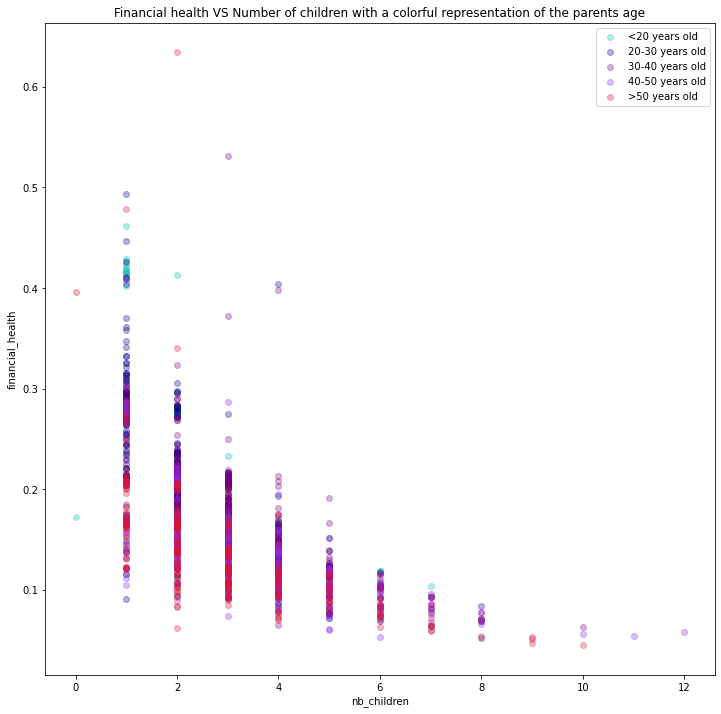

In [16]:
parents_age = data1['parents_age'].values
under_20_indexes = np.argwhere(parents_age < 20)[:,0]
between_20_30_indexes = np.argwhere(np.logical_and(parents_age >= 20, parents_age < 30))[:,0]
between_30_40_indexes = np.argwhere(np.logical_and(parents_age >= 30, parents_age < 40))[:,0]
between_40_50_indexes = np.argwhere(np.logical_and(parents_age >= 40, parents_age < 50))[:,0]
over_50_indexes = np.argwhere(parents_age >= 50)[:,0]
indexes = [under_20_indexes, between_20_30_indexes, between_30_40_indexes, between_40_50_indexes, over_50_indexes]
colors = ['c', 'darkblue', 'purple', 'blueviolet', 'crimson']
legends = ['<20 years old', '20-30 years old', '30-40 years old', '40-50 years old', '>50 years old']

fig, ax = plt.subplots(figsize=(12, 12))
for c, l, i in zip(colors, legends, indexes):
    ax.scatter(data1.loc[i, 'nb_children'], data1.loc[i, 'financial_health'], c=c, alpha=0.3, label=l)

ax.set_xlabel('nb_children')
ax.set_ylabel('financial_health')
ax.set_title('Financial health VS Number of children with a colorful representation of the parents age')
ax.legend()

What strikes us is this shape in 1/x with different layers corresponding to the age of the parents. Indeed, young parents cannot have as many children as older parents for physical reasons. So we can deduce a relationship between the number of children and the financial health of the household for each slice of mean age of the parents.

This what we are doing next, finding a linear reliationship between *nb_children* and 1 / *financial_health*.

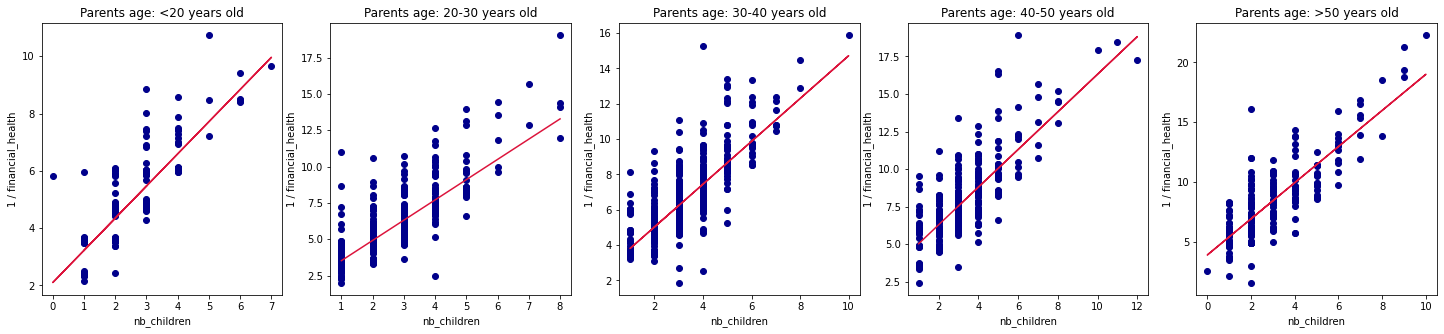

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

linear_models = []
R_squarred = []
coeffs = []
intercepts = []

for j, i in enumerate(indexes):
    x, y = data1.loc[i, 'nb_children'], 1 / data1.loc[i, 'financial_health']
    axs[j].scatter(x, y, c='darkblue')
    linear_model = LinearRegression().fit(np.reshape(x.values, (-1, 1)), y)
    linear_models.append(linear_model)
    R_squarred.append(round(linear_model.score(np.reshape(x.values, (-1, 1)), y), 3))
    coeffs.append(round(linear_model.coef_[0], 3))
    intercepts.append(round(linear_model.intercept_, 3))
    axs[j].plot(x, linear_model.predict(np.reshape(x.values, (-1, 1))), c='crimson')
    
    axs[j].set_xlabel('nb_children')
    axs[j].set_ylabel('1 / financial_health')
    axs[j].set_title(f'Parents age: {legends[j]}')

plt.show()

We then report the parameters of the model. Taking a closer look at the R² coefficients tells us if the model is indeed valid. What we see is that R² >= 0.615 for every model, which is significant for a social study (not to mention the source of error due to the *Nans* treatments).

In [18]:
df_lin_mods = pd.DataFrame(np.array([coeffs, intercepts, R_squarred]), columns=legends)
s = pd.Series(['coef', 'intercept', 'R2'])
df_lin_mods = df_lin_mods.set_index(s)
df_lin_mods.head()

,<20 years old,20-30 years old,30-40 years old,40-50 years old,>50 years old
coef,1.124,1.393,1.213,1.254,1.513
intercept,2.102,2.139,2.595,3.777,3.881
R2,0.673,0.733,0.681,0.615,0.678


Now let's take a broader look. Let's plot the variables that are weakly correlated to *nb_children* versus *financial_health* to look for correlations, even weak ones.

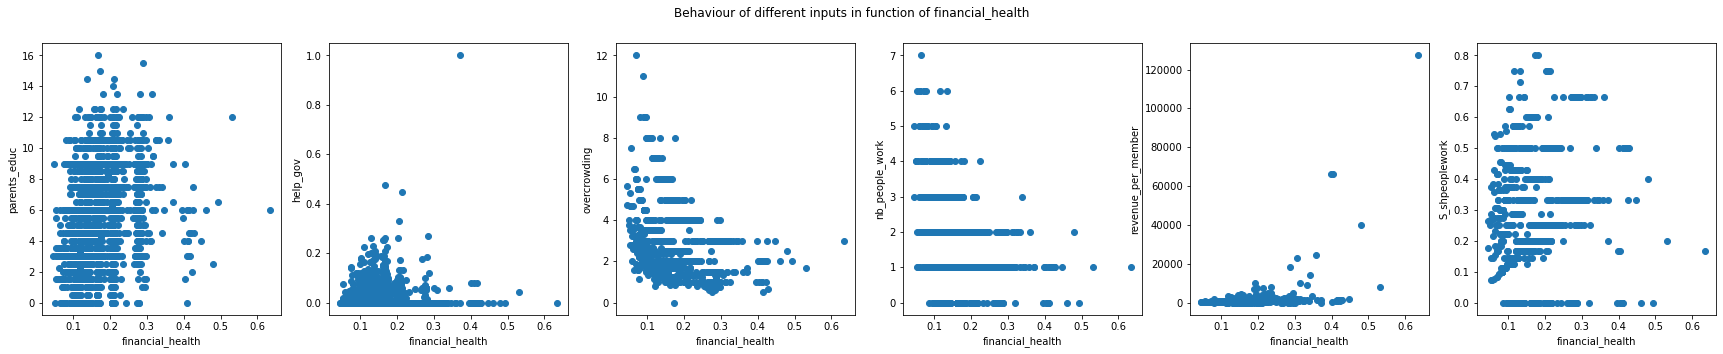

In [19]:
data1['nb_people_work'] = data1['S_shpeoplework'] * data1['S_HHpeople']
data1['revenue_per_member'] = data1['S_incomepc'] / data1['nb_people_work']

data1.loc[np.argwhere(data1['nb_people_work'].values == 0)[:, 0], 'revenue_per_menber'] = 0

scatter_plots(data1, data1, 'financial_health', ['parents_educ', 'help_gov', 'overcrowding', 'nb_people_work', 'revenue_per_member', 'S_shpeoplework'])

Interestingly, we notice that there is no correlation between the number of years of study of the parents and the financial health. Maybe this is due to the fact that we are in a relatively homogeneous neighbourhood of a slum.

On the other hand, we can detect weak correlations between financial health and the help of the government, indicating that maybe the help is not optimally distributed.

Looking at the 3 variables about work, we see some expected although weak behaviours:
- as the financial health increase, the number of people working decreases, indicating lower revenues
- this is indeed confirmed by a weak trend of revenues per working member that increases with financial health
- finally the financial health tends to increase with the share of people working in the household (less people to feed that don't bring a salary). This is not to be mixed with the number of people working, which is not representative of the size of the household and hence of the expenses.

Last but not least, the overcrowding seems to be correlated to financial health exactly as the number of children is to financial health. This is confirmed by the graphs below that show the same plots but in function of the number of children, and where we can see a somehow linear correlation between overcrowding and the number of children.

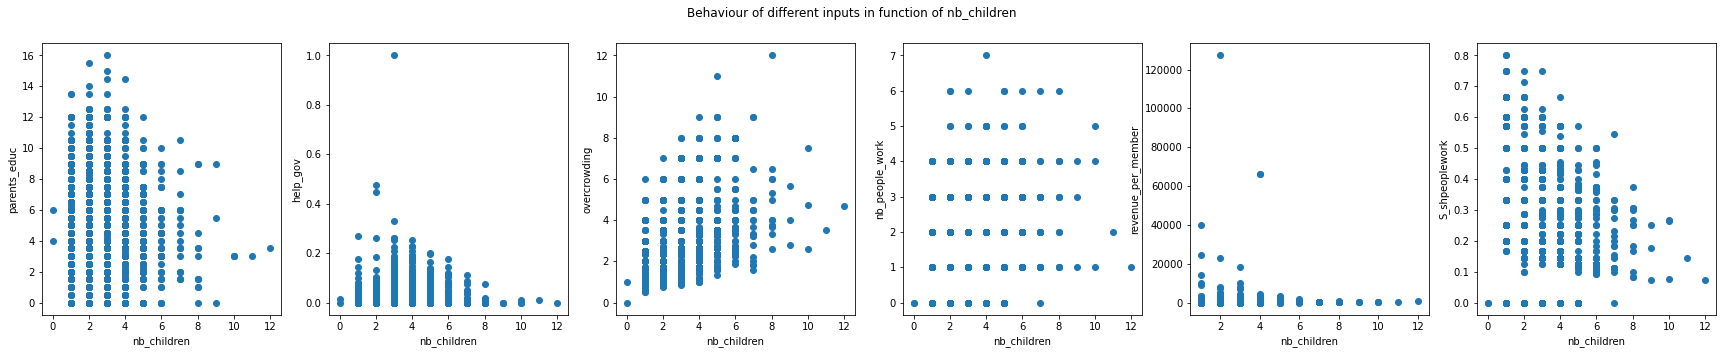

In [20]:
scatter_plots(data1, data1, 'nb_children', ['parents_educ', 'help_gov', 'overcrowding', 'nb_people_work', 'revenue_per_member', 'S_shpeoplework'])

For these latter plots, one remark only in order not to be too much redundant with the previous discussion: the help of the government seems to be decreasing as the number of children increases, which points out a flaw in the system since we just saw that a high number of children tends to indicate a poor household.

To confirm these sayings, let's look at the correlation between this set of variables and the financial health:

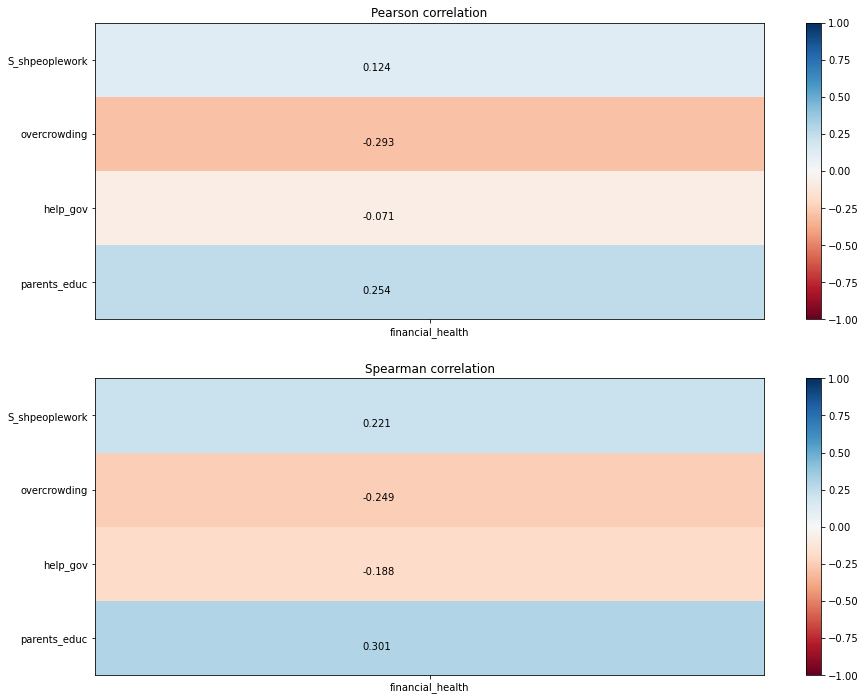

In [21]:
pearson_corr_dic2, pearson_p_dic2, pearson_corr_for_plot2, pearson_p_for_plot2 = find_correlation(pearsonr,
                                                                                                  data1,
                                                                                                  data1,
                                                                                                  ['parents_educ', 'help_gov', 'overcrowding', 'S_shpeoplework'],
                                                                                                  ['financial_health'])
spearman_corr_dic2, spearman_p_dic2, spearman_corr_for_plot2, spearman_p_for_plot2 = find_correlation(spearmanr,
                                                                                                      data1,
                                                                                                      data1,
                                                                                                      ['parents_educ', 'help_gov', 'overcrowding', 'S_shpeoplework'],
                                                                                                  ['financial_health'])

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
plot_correlations(axs[0], fig, pearson_corr_for_plot2, pearson_p_for_plot2, ['financial_health'], ['parents_educ', 'help_gov', 'overcrowding', 'S_shpeoplework'], 'Pearson correlation')
plot_correlations(axs[1], fig, spearman_corr_for_plot2, spearman_p_for_plot2, ['financial_health'], ['parents_educ', 'help_gov', 'overcrowding', 'S_shpeoplework'], 'Spearman correlation')
plt.show()

We see here that the correlations, although weak, are significant.

## Worldwide

Now let's look at these trends worldwide, and in particular the trends in children per woman and children mortality versus the country GDP.

Text(0.5, 0.98, 'Trends in country GDP vs trends in fertility and children mortality')

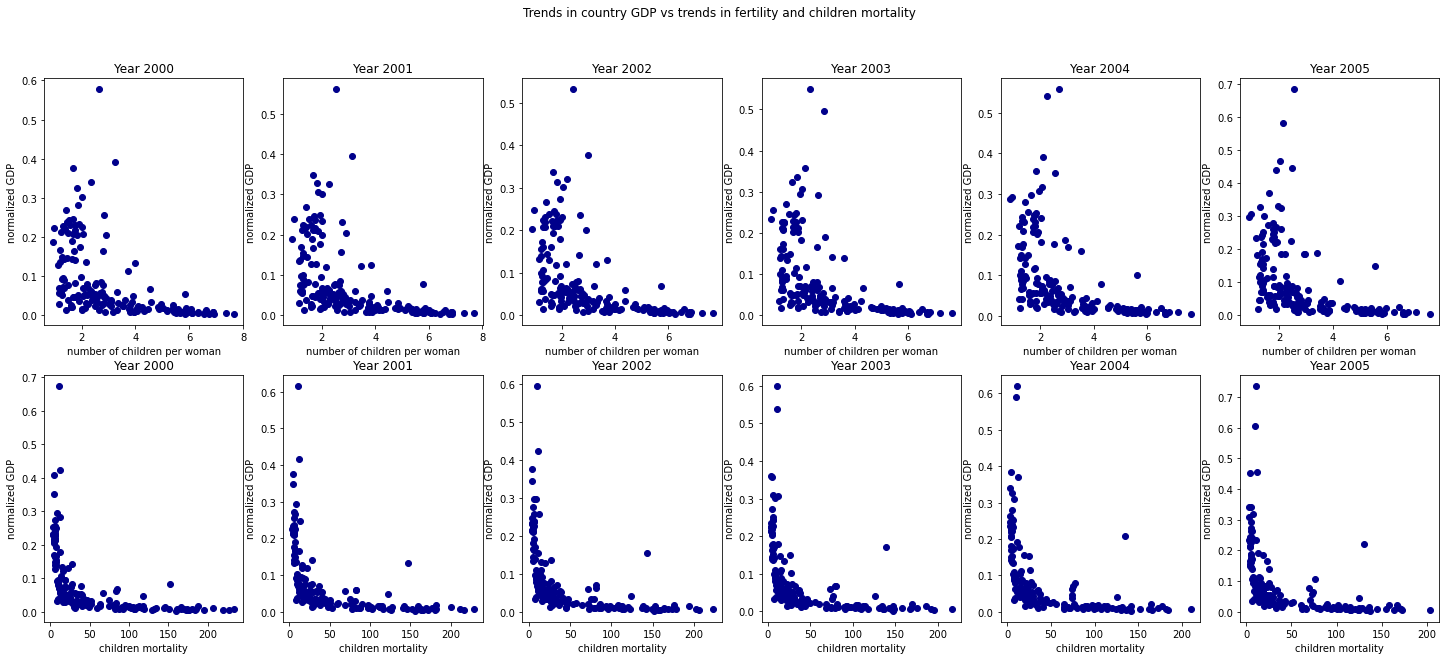

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(25, 10))

years = [2000, 2001, 2002, 2003, 2004, 2005]
for i, year in enumerate(years):
    y3 = data3.loc[np.argwhere(data3['Year'].values == year)[:, 0], ['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))']]
    x3 = data3.loc[np.argwhere(data3['Year'].values == year)[:, 0], ['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)']]
    y4 = data4.loc[np.argwhere(data4['Year'].values == year)[:, 0], ['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))']]
    x4 = data4.loc[np.argwhere(data4['Year'].values == year)[:, 0], ['Child mortality (Select Gapminder, v10) (2017)']]
    axs[0, i].scatter(x3, y3, c='darkblue')
    axs[1, i].scatter(x4, y4, c='darkblue')
    
    axs[0, i].set_xlabel('number of children per woman')
    axs[0, i].set_ylabel('normalized GDP')
    axs[1, i].set_xlabel('children mortality')
    axs[1, i].set_ylabel('normalized GDP')
    
    axs[0, i].set_title(f'Year {year}')
    axs[1, i].set_title(f'Year {year}')
    
fig.suptitle('Trends in country GDP vs trends in fertility and children mortality')

We see exactly the same trends as we saw locally in Durango and Torreon slums. Let's see if we can do the same regressions.

-33.187658189925315
-32.44335295800878
-33.24816356274108
-33.30377977348902
-30.45505892924986
-30.27392043358951


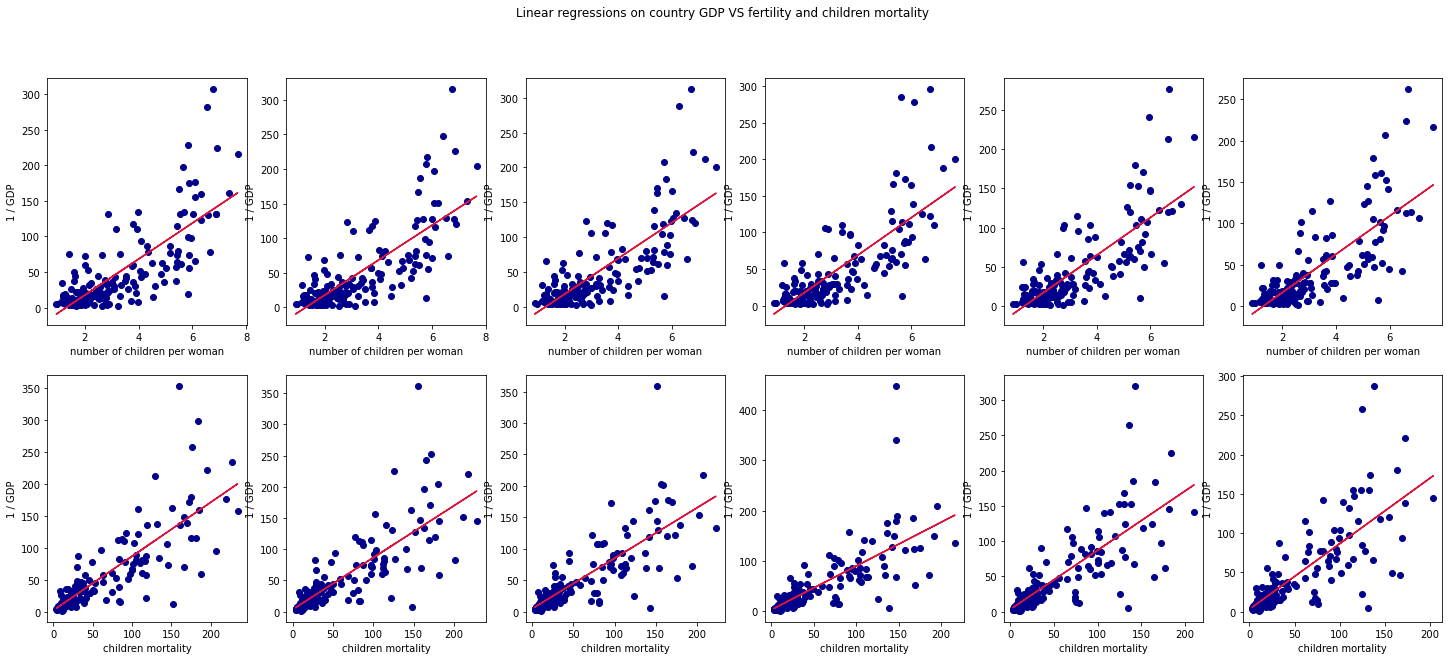

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(25, 10))

linear_models = []
R_squarred = []
coeffs = []
intercepts = []

for i, year in enumerate(years):
    
    y3 = 1 / data3.loc[np.argwhere(data3['Year'].values == year)[:, 0], ['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))']]
    x3 = data3.loc[np.argwhere(data3['Year'].values == year)[:, 0], ['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)']]
    y4 = 1 / data4.loc[np.argwhere(data4['Year'].values == year)[:, 0], ['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))']]
    x4 = data4.loc[np.argwhere(data4['Year'].values == year)[:, 0], ['Child mortality (Select Gapminder, v10) (2017)']]
    
    axs[0, i].scatter(x3, y3, c='darkblue')
    axs[1, i].scatter(x4, y4, c='darkblue')
    linear_model3 = LinearRegression().fit(np.reshape(x3.values, (-1, 1)), y3)
    linear_model4 = LinearRegression().fit(np.reshape(x4.values, (-1, 1)), y4)
    linear_models.append([linear_model3, linear_model4])
    R_squarred.append([round(linear_model3.score(np.reshape(x3.values, (-1, 1)), y3), 3), round(linear_model4.score(np.reshape(x4.values, (-1, 1)), y4), 3)])
    print(linear_model3.intercept_[0])
    coeffs.append([round(linear_model3.coef_[0, 0], 3), round(linear_model4.coef_[0, 0], 3)])
    intercepts.append([round(linear_model3.intercept_[0], 3), round(linear_model4.intercept_[0], 3)])
    axs[0, i].plot(x3, linear_model3.predict(np.reshape(x3.values, (-1, 1))), c='crimson')
    axs[1, i].plot(x4, linear_model4.predict(np.reshape(x4.values, (-1, 1))), c='crimson')
    
    axs[0, i].set_xlabel('number of children per woman')
    axs[0, i].set_ylabel('1 / GDP')
    
    axs[1, i].set_xlabel('children mortality')
    axs[1, i].set_ylabel('1 / GDP')

fig.suptitle('Linear regressions on country GDP VS fertility and children mortality')
plt.show()

linear_models = np.array(linear_models);
R_squarred = np.array(R_squarred);
coeffs = np.array(coeffs);
intercepts = np.array(intercepts);

***Number of children per woman***

In [24]:
df3_lin_mods = pd.DataFrame(np.array([coeffs[:, 0], intercepts[:, 0], R_squarred[:, 0]]), columns=years)
s = pd.Series(['coef', 'intercept', 'R2'])
df3_lin_mods = df3_lin_mods.set_index(s)
df3_lin_mods.head()

,2000,2001,2002,2003,2004,2005
coef,25.289,25.196,25.599,25.546,23.918,23.208
intercept,-33.188,-32.443,-33.248,-33.304,-30.455,-30.274
R2,0.599,0.604,0.615,0.604,0.622,0.602


***Children mortality***

In [25]:
df4_lin_mods = pd.DataFrame(np.array([coeffs[:, 1], intercepts[:, 1], R_squarred[:, 1]]), columns=years)
s = pd.Series(['coef', 'intercept', 'R2'])
df4_lin_mods = df4_lin_mods.set_index(s)
df4_lin_mods.head()

,2000,2001,2002,2003,2004,2005
coef,0.845,0.831,0.805,0.869,0.84,0.836
intercept,1.848,3.258,4.373,3.006,3.36,3.055
R2,0.678,0.654,0.652,0.571,0.63,0.623


We see some good R², but surprinsingly less good than those found for the 2 slums. At a larger scale, we would expect less variability and better fit. But actually, there are less countries in the world than there are subject in the study and this could explain the less good fit. Anyway we can see some very similar results, locally and worldwide as well as between the number of children per woman and the children mortality (as expected).

## Placebo or not Placebo ? That is the question.

For this last part, we want to investigate if the implementation of Pisofirme brings a Placebo effect along with the already proven effects.

For that we look into the difference of share of cement floors between 2000 and 2005 for each household. If there is no Placebo effect, we would expect to find that for an equal augmentation of cementation, the effects are similar. As we cannot directly compare that (the treatment group has a higher cement augmentation during this period), we look at the $\beta$ coefficients that correspond to a linear regression *output = f(augmentation in cement floor)*.

Here we choose the stress scale and the depression scale as output. A Placebo is not effective on diseases contamination so we look at psychological consequences. Just as before, we leave out the *S_satisfloor*, *S_satishouse* and *S_satislife* variables to avoid redundancy and to avoid mathematical interdictions to compute variance and standard deviations on a binary variable.

The $\beta$ coefficients are computed as follow:
$$
\beta = \frac{Cov(y, x)}{Var(x)}
$$

Then we want to test if the difference between the two $\beta$ is significant at a 95% confidence interval. To do so, we create 2 bootstrapped confidence intervals, one for each output.

The results are just beneath. We find that the 2 ,confidence intervals contain 0, indicating that we cannot reject that the two $\beta$ are the same. Without being a formal proof, it leads us to think that there is no Placebo effect. Maybe this should be expected since people in these slum are apparently customary with government help programs and that *PisoFirme* might just has been viewed as another of these numerous programs.

In [26]:
def draw_bs_replicates(data1, data2, func, size):
    """
    Creates a bootstrap sample, computes replicates and returns replicates array
    param data1, data2: the data for which we want to get a bootstrapped confidence interval for the difference of a parameter between the 2 datasets
    param func: the function to evaluate the data on the variable on which we want a confidence interval
    param size: the number of samplings we will perform for the bootstrap
    """
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        rng = np.random.default_rng()
        bs_sample1 = rng.choice(data1, size=len(data1))
        bs_sample2 = rng.choice(data2, size=len(data2))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample1, bs_sample2)
    
    return bs_replicates


def find_beta_diff(vals1, vals2):
    """
    Returns the difference of beta coefficients between vals1 and vals2, the 2 populations that we are studying
    """
    return find_beta(vals1) - find_beta(vals2)


def find_beta(vals):
    """
    Returns the beta coefficient corresponding to the model y' = beta*x' + intercept 
    with x' and y' the standardised values of x, y = vals.T
    """
    x, _ = vals.T
    return np.cov(vals.T)[0, 1] / (np.std(x) ** 2)

data_treatment = data1.loc[np.argwhere(data1['dpisofirme'].values == 1)[:, 0]]
data_control = data1.loc[np.argwhere(data1['dpisofirme'].values == 0)[:, 0]]
for out in ['S_cesds', 'S_pss']:
    vals1 = np.array([data_treatment['S_shcementfloor'] - data_treatment['S_cementfloor2000'], data_treatment[out]]).T
    vals2 = np.array([data_control['S_shcementfloor'] - data_control['S_cementfloor2000'], data_control[out]]).T

    # find the difference in betas for 10000 random samplings with replacement from vals1 and vals2
    bs_replicates_betas = draw_bs_replicates(vals1, vals2, find_beta_diff, 10000)

    # 95% confidence interval
    percentiles = [np.percentile(bs_replicates_betas, [2.5])[0], np.percentile(bs_replicates_betas, [97.5])[0]]
    CI = [round(percentiles[0], 3), round(percentiles[1], 3)]
    
    print(f"95% CI for the difference of beta coefficients between the treatment and control group for the output variable {out}: {CI}")
    print(f"Mean difference in the beta coefficient for the output variable {out}: {np.mean(bs_replicates_betas)}")

95% CI for the difference of beta coefficients between the treatment and control group for the output variable S_cesds: [-1.037, 2.468]
Mean difference in the beta coefficient for the output variable S_cesds: 0.7200132861530323
95% CI for the difference of beta coefficients between the treatment and control group for the output variable S_pss: [-1.149, 1.464]
Mean difference in the beta coefficient for the output variable S_pss: 0.17447270895966416
